In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
data = pd.read_csv('cleaned_merged_race_data.csv')

# Overview Of Data
print(data.info())

# Checking first few rows
print(data.head())
# Summary Of data
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pos            9814 non-null   int64  
 1   No             9814 non-null   int64  
 2   Driver         9814 non-null   object 
 3   Car            9814 non-null   object 
 4   Laps           9814 non-null   float64
 5   Time/Retired   9814 non-null   object 
 6   PTS_race       9814 non-null   float64
 7   Year           9814 non-null   int64  
 8   Grand Prix     9814 non-null   object 
 9   DriverCode     9814 non-null   object 
 10  Date           9814 non-null   object 
 11  PTS_details    9814 non-null   float64
 12  Race Position  9814 non-null   int64  
 13  Pos_standings  9814 non-null   int64  
 14  Nationality    9814 non-null   object 
 15  PTS            9814 non-null   float64
 16  No_grid        9814 non-null   int64  
 17  Pos_grid       9814 non-null   int64  
 18  Winner  

In [11]:
data['Grand Prix'].unique()

array(['Australia', 'Malaysia', 'China', 'Turkey', 'Spain', 'Monaco',
       'Canada', 'Europe', 'Great Britain', 'Germany', 'Hungary',
       'Belgium', 'Italy', 'Singapore', 'Japan', 'South Korea', 'India',
       'Abu Dhabi', 'Brazil', 'Bahrain', 'United States', 'Austria',
       'Russia', 'Mexico', 'Azerbaijan', 'France', 'Styria',
       '70th Anniversary', 'Tuscany', 'Eifel', 'Portugal',
       'Emilia Romagna', 'Sakhir', 'Netherlands', 'Qatar', 'Saudi Arabia',
       'Miami'], dtype=object)

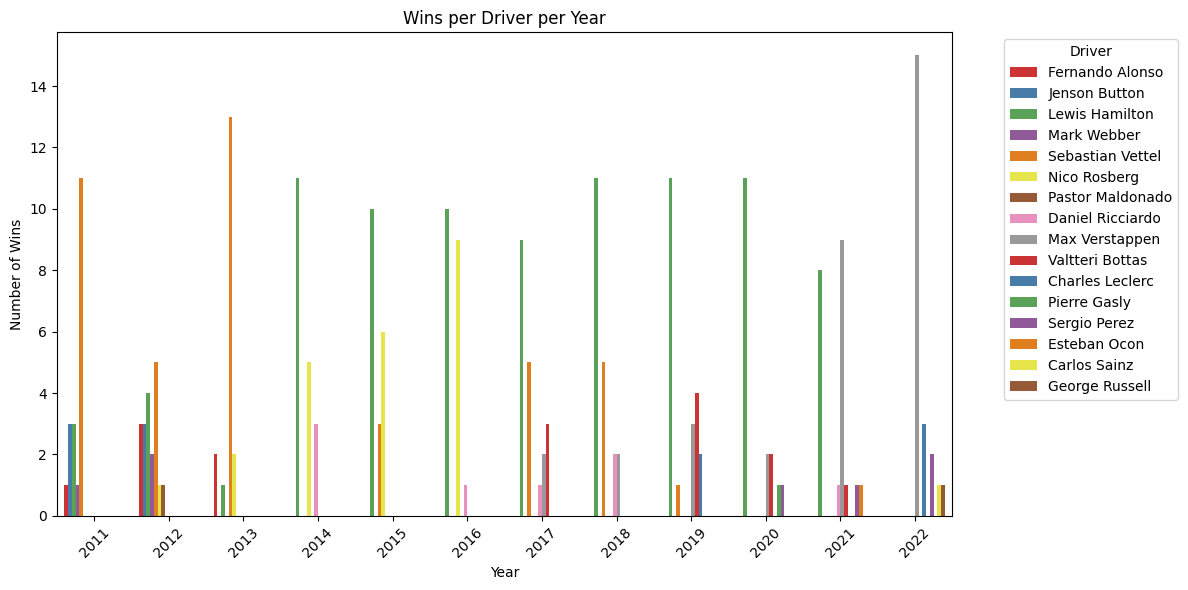

In [16]:
data['Win'] = data['Driver'] == data['Winner']

# Count distinct wins per driver per year per Grand Prix
distinct_wins_per_year_grandprix = data[data['Win']].drop_duplicates(subset=['Driver', 'Year', 'Grand Prix'])

# Summing total distinct wins per driver per year
wins_per_year = distinct_wins_per_year_grandprix.groupby(['Driver', 'Year']).size().reset_index(name='Wins')

# Plot
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Set1", n_colors=len(wins_per_year['Driver'].unique()))

sns.barplot(data=wins_per_year, x='Year', y='Wins', hue='Driver', palette=palette)
plt.title('Wins per Driver per Year')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

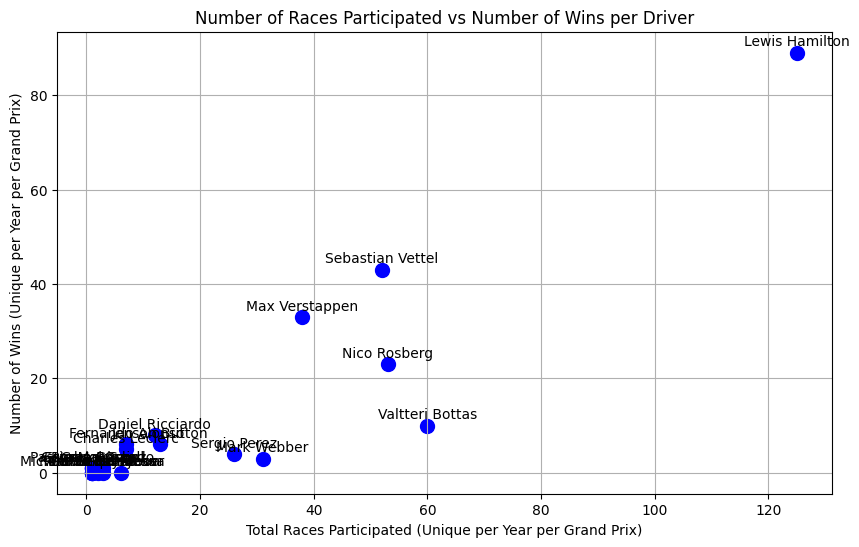

In [13]:
# Identify the winners
data['Win'] = data['Driver'] == data['Winner']

# Count unique races per driver per year per grand prix
unique_races_per_driver = data.groupby(['Driver', 'Year', 'Grand Prix']).size().reset_index(name='Races')
total_races = unique_races_per_driver.groupby('Driver').size().reset_index(name='Total Races')

# Count unique wins per driver per year per grand prix
unique_wins_per_driver = data[data['Win']].groupby(['Driver', 'Year', 'Grand Prix']).size().reset_index(name='Wins')
total_wins = unique_wins_per_driver.groupby('Driver').size().reset_index(name='Wins')

# Merging the two dataframes on Driver
driver_stats = pd.merge(total_races, total_wins, on='Driver', how='left').fillna(0)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(driver_stats['Total Races'], driver_stats['Wins'], color='blue', s=100)

# Adding labels and title
plt.title('Number of Races Participated vs Number of Wins per Driver')
plt.xlabel('Total Races Participated (Unique per Year per Grand Prix)')
plt.ylabel('Number of Wins (Unique per Year per Grand Prix)')
plt.grid(True)

for i in range(len(driver_stats)):
    plt.annotate(driver_stats['Driver'][i], 
                 (driver_stats['Total Races'][i], driver_stats['Wins'][i]), 
                 textcoords="offset points", 
                 xytext=(0,5), 
                 ha='center')

plt.show()


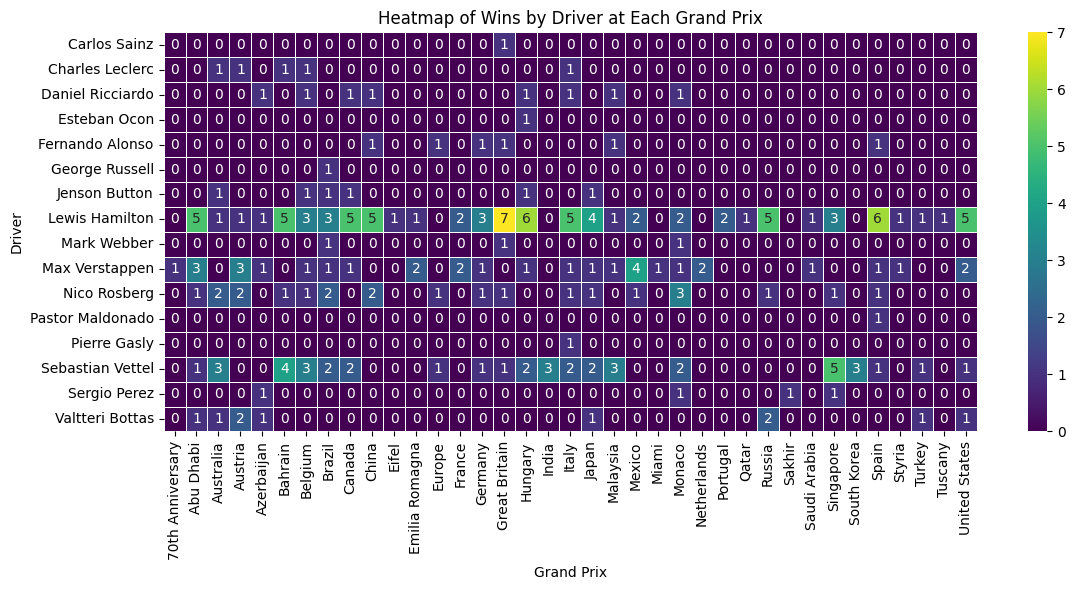

In [18]:
# Identify the winners
data['Win'] = data['Driver'] == data['Winner']

# Getting Winning records
wins_data = data[data['Win']][['Driver', 'Grand Prix', 'Year']].drop_duplicates()

# Count unique wins per driver per Grand Prix
win_counts = wins_data.groupby(['Driver', 'Grand Prix']).size().reset_index(name='Wins')

# Pivot the data for heatmap format
win_pivot = win_counts.pivot(index="Driver", columns="Grand Prix", values="Wins").fillna(0)

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(win_pivot, annot=True, cmap='viridis', linewidths=0.5)

# Add labels and title
plt.title('Heatmap of Wins by Driver at Each Grand Prix')
plt.xlabel('Grand Prix')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()


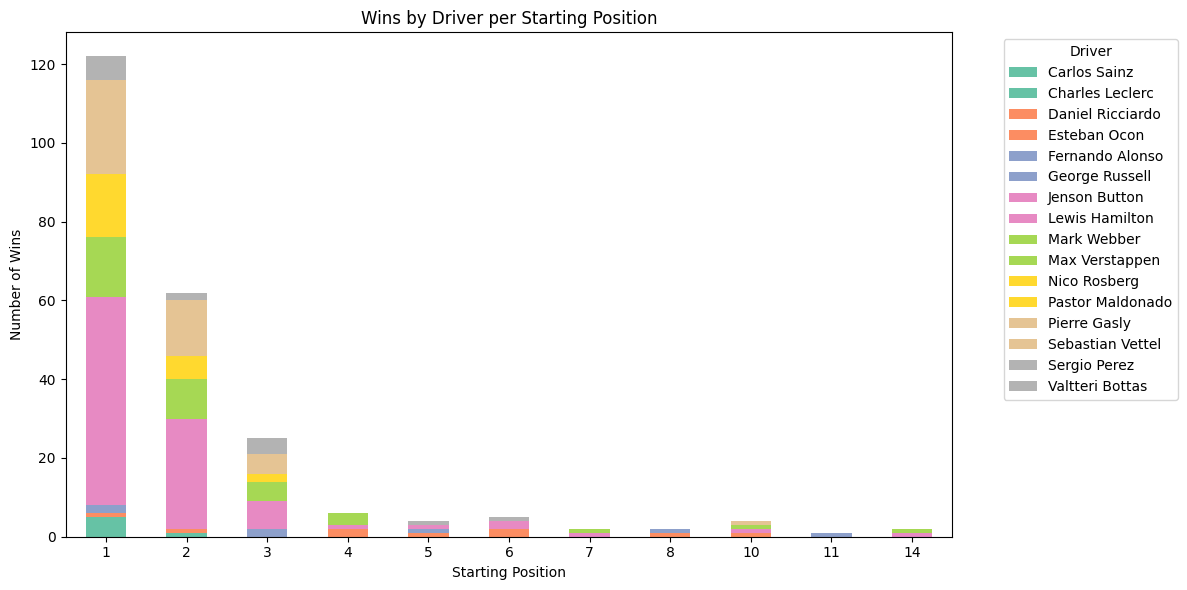

In [15]:
# Identify the winners
data['Win'] = data['Driver'] == data['Winner']

# Checking winning records, counting each driver per year per Grand Prix only once
wins_data = data[data['Win']][['Driver', 'Pos_grid', 'Year', 'Grand Prix']].drop_duplicates()

# Count wins per driver for each starting position
win_counts = wins_data.groupby(['Pos_grid', 'Driver']).size().reset_index(name='Wins')

# Create a pivot table for stacked bar plot visualization
pivot_table = win_counts.pivot(index='Pos_grid', columns='Driver', values='Wins').fillna(0)

# Plot the stacked bar chart
pivot_table.plot(kind='bar', figsize=(12, 6), stacked=True, colormap='Set2')

# Add labels and title
plt.title('Wins by Driver per Starting Position')
plt.xlabel('Starting Position')
plt.ylabel('Number of Wins')
plt.xticks(rotation=0)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
